In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from rlway.pyosrd import OSRD

In [21]:
OSRD.use_cases

['c1',
 'c1y2',
 'c2x2',
 'c2xx2',
 'c2y1y2',
 'c2z2z2',
 'c3y1',
 'cvg_dvg',
 'point_switch',
 'station_capacity2',
 'straight_line']

In [22]:
use_case='c2xx2'
sim = OSRD(use_case=use_case, dir='tmp')

[12:18:17,539] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[12:18:17,570] [INFO]              [FullInfra] parsing infra
[12:18:17,629] [INFO]              [FullInfra] adaptation to kotlin
[12:18:17,664] [INFO]              [FullInfra] loading signals
[12:18:17,670] [INFO]              [FullInfra] building blocks
[12:18:17,675] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[12:18:17,689] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.5
[12:18:17,734] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.6
[12:18:17,739] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.7
[12:18:17,743] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.8
[12:18:17,746] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.9
[12:18:17,749] [INFO]  [StandaloneSimulationCommand] All simulations compl

In [23]:
sim.space_time_chart_plotly(1, points_to_show=['station','switch'], eco_or_base='base')

In [24]:
from rlway.schedule_from_osrd import schedule_from_osrd

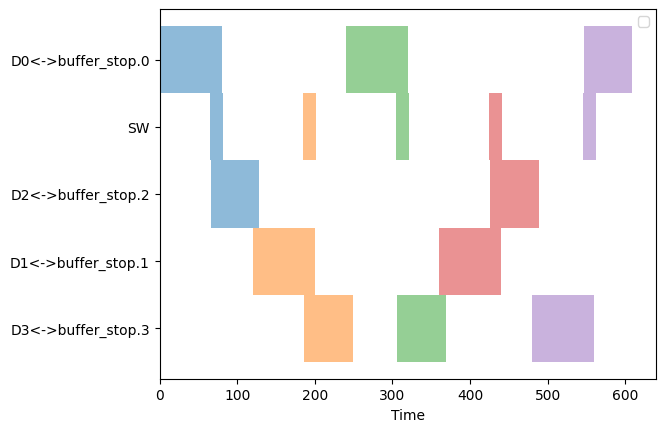

In [25]:
s = schedule_from_osrd(sim, eco_or_base='base')
ax = s.sort().plot()
ax.invert_yaxis()
ax.legend('')

In [38]:
type(sim.draw_infra_points(save='infra2.png'))

PIL.JpegImagePlugin.JpegImageFile

In [39]:
!ls *.png

infra2.png
